# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [2]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
114 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 114
Submissions graded.


### Dataset

In [3]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [4]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [5]:
# Filter by Graduate Year
specific_graduateyears = [2020, 2021, 2022, 2023, 2024]
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [6]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [7]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 99 student submissions.



### Institutions

Institution
Norges teknisk-naturvitenskapelige universitet (NTNU)    89
Høgskulen på Vestlandet (HVL)                            10
Name: count, dtype: int64


<Axes: ylabel='count'>

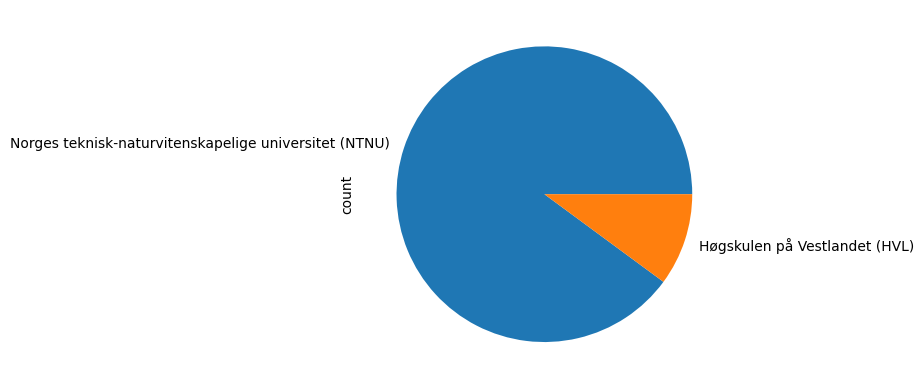

In [8]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2022.0    30
2023.0    21
2021.0    14
2024.0    14
2019.0     4
2010.0     2
2018.0     1
2020.0     1
Name: count, dtype: int64


<Axes: ylabel='count'>

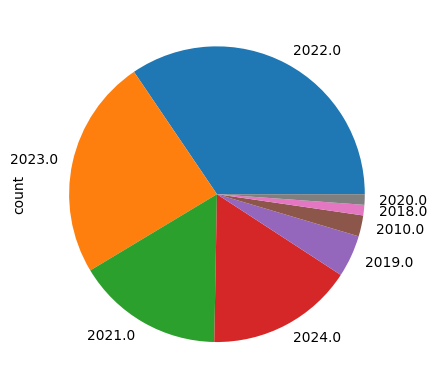

In [9]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    59
f    32
      8
Name: count, dtype: int64
Gender
m    0.595960
f    0.323232
     0.080808
Name: proportion, dtype: float64


<Axes: ylabel='count'>

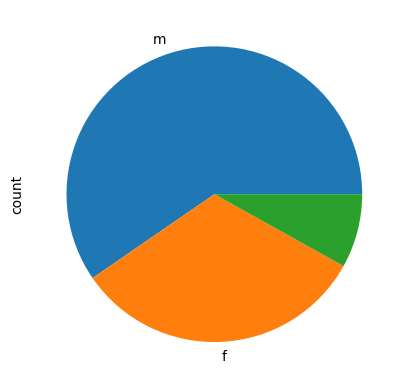

In [10]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [11]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

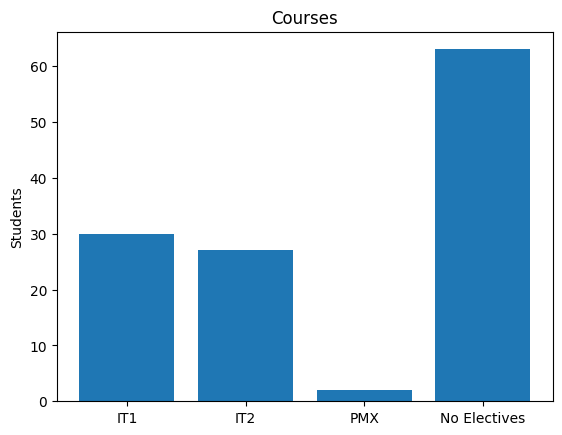

In [12]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

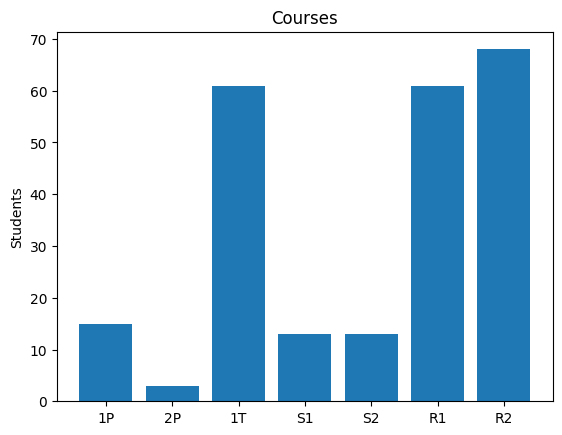

In [13]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    73
Ja     26
Name: count, dtype: int64
OutsideExperience
Nei    0.737374
Ja     0.262626
Name: proportion, dtype: float64


<Axes: ylabel='count'>

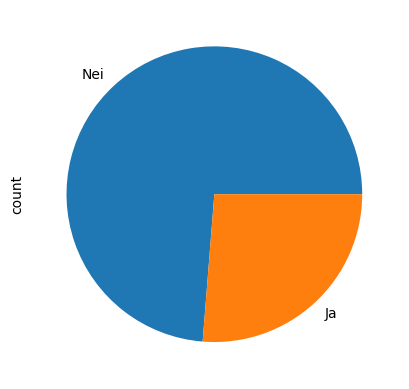

In [14]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [15]:
# Configurations
bins = 25
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 23.97
Standard deviation: 17.413


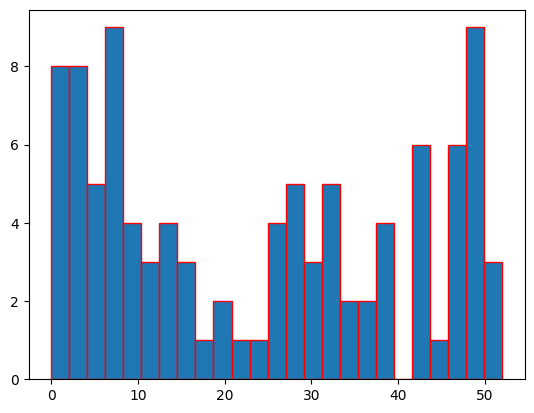

In [16]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.show() 

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

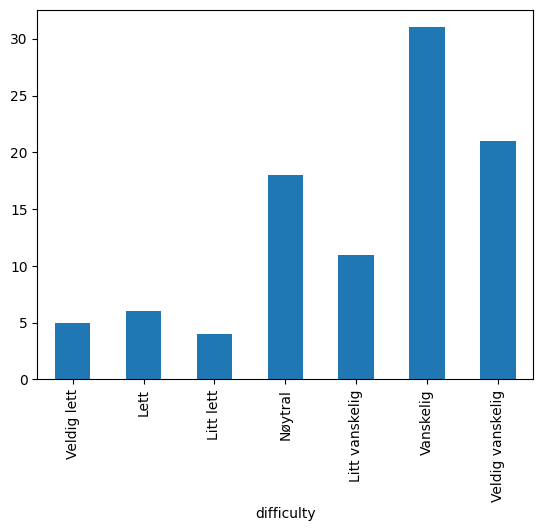

In [17]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [18]:
def compare_distributions(x, y, x_label, y_label):
    mean = x.mean()
    sd = x.std()
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()
    
    mean = y.mean()
    sd = y.std()
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

Mean of 2023 and 2024: 33.646
Standard deviation of 2023 and 2024: 13.344

Mean of before 2023: 18.678
Standard deviation of before 2023: 17.179


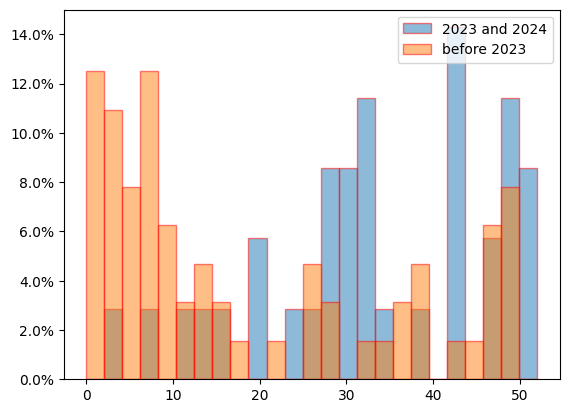

In [19]:
x = df[(df['GraduateYear'].isin([2023, 2024]))]['Total']
y = df[(~df['GraduateYear'].isin([2023, 2024]))]['Total']

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

### Gender

Mean of women: 18.681
Standard deviation of women: 15.993

Mean of men: 27.302
Standard deviation of men: 17.392


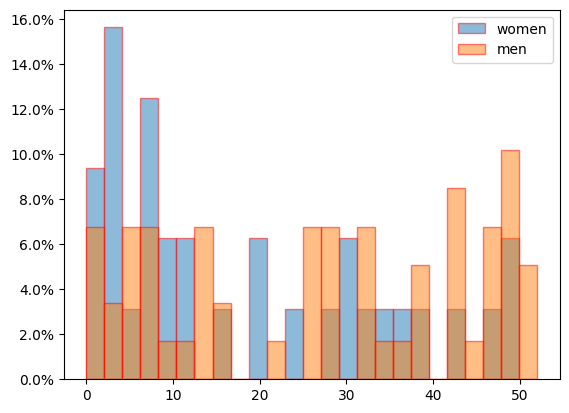

In [20]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [21]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [22]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       58.33 %
Booleans        64.39 %
Variables       50.94 %
Conditionals    61.87 %
Loops           33.33 %
Lists           39.14 %
Functions       27.61 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [23]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    print(df[task_column].value_counts()[:n_answers])

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [24]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
1    55
0    44
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             55
Jeg vet ikke    34
float            4
list             3
str              2
bool             1
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    57
0    42
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           57
Jeg vet ikke    32
int              5
str              4
bool             1
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
1    52
0    47
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             52
Jeg vet ikke    41
float            3
int              2
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    67
0    32
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            67
Jeg vet ikke    29
int              3
Name: count, dtype: int64


# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [25]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    84
0    15
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            84
I don't know    11
12.0             1
1212.0           1
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [26]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    67
0    32
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           67
I don't know    14
12.23            1
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [27]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    99
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        40
I don't know    32
246.0            8
123.0            1
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [28]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    62
0    37
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             62
I don't know    24
1.0              3
3.0              2
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [29]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    59
1    40
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    40
bca             40
abc              2
b + c + a        2
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [30]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    59
0    40
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0    59
10.0     2
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    55
0    44
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            55
I don't know    38
10.0             5
1.0              1
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [31]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    56
0    43
Name: count, dtype: int64

Top 5 most common answers:
Series([], Name: count, dtype: int64)
Number of correct responses:
Variables2b_points
1    57
0    42
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            57
I don't know    39
20.0             2
30.0             1
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [32]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    51
0    48
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    51
10.0     4
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0    60
1    39
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
I don't know    46
20.0            39
10.0            14
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [33]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0    54
1    45
Name: count, dtype: int64

Top 5 most common answers:
Series([], Name: count, dtype: int64)
Number of correct responses:
Variables4b_points
1    50
0    49
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            50
I don't know    46
20.0             3
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [34]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    52
0    47
Name: count, dtype: int64

Top 5 most common answers:
Series([], Name: count, dtype: int64)
Number of correct responses:
Variables5b_points
1    55
0    44
Name: count, dtype: int64

Top 5 most common answers:
Series([], Name: count, dtype: int64)
Number of correct responses:
Variables5c_points
1    53
0    46
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            53
I don't know    43
10.0             1
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [35]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    51
0    48
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    51
20.0     2
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0    57
1    42
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
30.0    42
10.0    11
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0    58
1    41
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
I don't know    45
30.0            41
20.0             7
10.0             5
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [36]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            77
Jeg vet ikke    21
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           86
Jeg vet ikke     8
True             3
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            72
Jeg vet ikke    14
False           11
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           88
Jeg vet ikke     9
True             1
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            82
Jeg vet ikke    11
False            5
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           75
Jeg vet ikke    21
True             2
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [37]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           59
Jeg vet ikke    37
True             2
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           76
Jeg vet ikke    18
True             4
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            57
Jeg vet ikke    29
False           12
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            76
Jeg vet ikke    19
False            2
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            58
Jeg vet ikke    29
False           11
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    50
True            46
False            2
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [38]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    49
False           47
True             2
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    53
False           42
True             3
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    51
True            44
False            3
Name: count, dtype: int64

Top 3 most common answers:
True and True
True            50
Jeg vet ikke    47
False            1
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    51
True            37
False            9
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    53
True            39
False            5
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [39]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            82
Jeg vet ikke     9
False            5
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           75
Jeg vet ikke    21
True             2
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           77
Jeg vet ikke    11
True             9
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            60
Jeg vet ikke    21
False           17
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            71
Jeg vet ikke    17
False           10
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
False           54
Jeg vet ikke    37
True             7
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [40]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    73
0    26
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       73
Jeg vet ikke    18
1                8
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [41]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
1    55
0    44
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               55
Jeg vet ikke    34
1                5
Ingenting        3
1 og 2           2
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [42]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    62
0    37
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               62
Jeg vet ikke    34
1                1
1 og 3           1
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [43]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    55
0    44
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          55
Jeg vet ikke    32
1                8
2                2
3                1
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [44]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    66
1    33
Name: count, dtype: int64

Top 5 most common answers:
Loops1
I don't know    38
10.0            33
9.0             14
1.0              6
123456789.0      3
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [45]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    66
1    33
Name: count, dtype: int64

Top 5 most common answers:
Loops2
I don't know    35
10.0            33
8.0             16
2.0              6
2468.0           3
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [46]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
1    52
0    47
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100.0           52
I don't know    36
0.0              5
102.0            1
98.0             1
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [47]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    68
1    31
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    42
4.0             31
3.0             11
0.0              4
6.0              2
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [48]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    67
1    32
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    60
5.0             32
0.0              2
113.0            1
125.0            1
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [49]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    71
1    28
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    63
9.0             28
36.0             1
-1.0             1
49.0             1
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [50]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    63
1    36
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    47
20.0            36
10.0            13
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [51]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    64
1    35
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    48
25.0            35
15.0            13
65.0             1
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [52]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
1    51
0    48
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    51
Jeg vet ikke    39
[15, 35, 55]     1
[5, 15, 25]      1
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    66
1    33
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    49
[5, 35, 25]     33
[15, 35, 55]    10
[5, 15, 25]      4
[10, 35, 30]     1
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [53]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
1    51
0    48
Name: count, dtype: int64

Top 5 most common answers:
Functions1
15.0            51
I don't know    45
510.0            1
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [54]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    62
1    37
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    58
1.0             37
2.0              1
100.0            1
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [55]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    77
1    22
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    60
1.0             22
12.0             8
2.0              3
3.0              2
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [56]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    75
1    24
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    69
5.0             24
6.0              2
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [57]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    70
1    29
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    53
10.0            29
9.0              7
6.0              3
5.0              2
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [58]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    77
1    22
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know       71
abcxyz             22
abcxabccyabcz       1
abcxabcxyabcxyz     1
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [59]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    71
1    28
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    67
c               28
6                1
b                1
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [60]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    74
1    25
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    67
25.0            25
15.0             3
21.0             1
20.0             1
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [61]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    91
1     8
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    70
80.0            10
90.0             8
2030.0           1
22.0             1
Name: count, dtype: int64
